<a href="https://colab.research.google.com/github/choisungmin123/deep-learning-practice/blob/main/250514_convolution_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이미지 인식의 꽃, 컨볼루션 신경망(CNN)

## 이미지를 인식하는 원리

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import sys
import numpy as np

(X_train, y_train) , (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


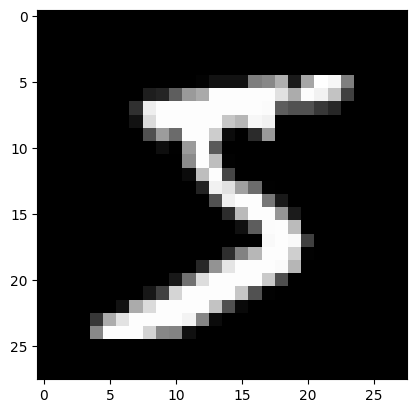

In [2]:
plt.imshow(X_train[0], cmap='gray')
plt.show()

In [3]:
X_train[0][0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=uint8)

In [4]:
# 정렬 예제
variable = 123456789

print("%20s" % variable)
print("%-20s" % variable) # -를 붙이면 왼쪽부터 자릿수를 채워줌

           123456789
123456789           


In [5]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [6]:
X_train = X_train.reshape(-1, 784) # 784 = 28*28
X_train.shape

(60000, 784)

In [7]:
# 표준화
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(-1, 784).astype('float64') / 255

In [8]:
print("class : %d " % (y_train[0]))

#원-핫 인코딩
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0])

class : 5 
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## 다층 퍼셉트론으로 분류

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

import os

# 모델 정의
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화를 위한 설정
modelpath="./MNIST_MLP.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18533, saving model to ./MNIST_MLP.keras

Epoch 2: val_loss improved from 0.18533 to 0.13463, saving model to ./MNIST_MLP.keras

Epoch 3: val_loss improved from 0.13463 to 0.11864, saving model to ./MNIST_MLP.keras

Epoch 4: val_loss improved from 0.11864 to 0.10038, saving model to ./MNIST_MLP.keras

Epoch 5: val_loss improved from 0.10038 to 0.09430, saving model to ./MNIST_MLP.keras

Epoch 6: val_loss improved from 0.09430 to 0.09057, saving model to ./MNIST_MLP.keras

Epoch 7: val_loss improved from 0.09057 to 0.08357, saving model to ./MNIST_MLP.keras

Epoch 8: val_loss improved from 0.08357 to 0.08328, saving model to ./MNIST_MLP.keras

Epoch 9: val_loss did not improve from 0.08328

Epoch 10: val_loss improved from 0.08328 to 0.07902, saving model to ./MNIST_MLP.keras

Epoch 11: val_loss did not improve from 0.07902

Epoch 12: val_loss did not improve from 0.07902

Epoch 13: val_loss did not improve from 0.07902

Epoch 14: val_loss did n

In [11]:
# 검증 데이터셋과 학습 데이터셋의 오차 각각 저장 후 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

In [12]:
y_loss

[0.35138368606567383,
 0.1464402973651886,
 0.09907976537942886,
 0.07104610651731491,
 0.054742470383644104,
 0.04200008884072304,
 0.03257862851023674,
 0.02468602918088436,
 0.018802518025040627,
 0.015234271995723248,
 0.011111515574157238,
 0.008762974292039871,
 0.007168732583522797,
 0.0053507122211158276,
 0.004046821966767311,
 0.0029883391689509153,
 0.002359726233407855,
 0.0019351121736690402,
 0.00158540194388479,
 0.001400659210048616]

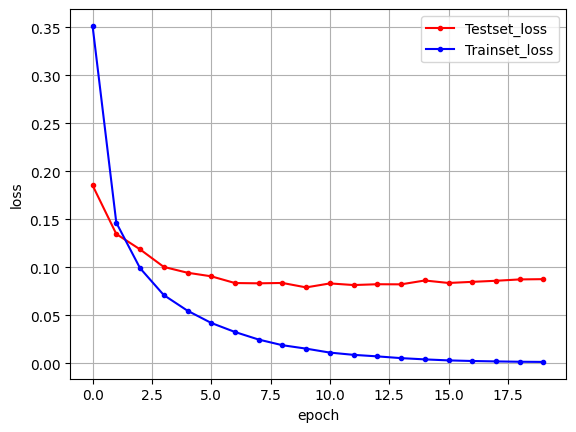

In [13]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 컨볼루션 신경망

확인 문제1 : 출력층의 활성화 함수에 들어갈 빈칸을 채우고 이유를 설명하세요

- 이유 : 다중 클래스 분류 문제를 해결하는 구조이기떄문에 활성화함수로 softmax를 사용해야한다

확인 문제 2 : 풀링 크기를 (3,3)에서 더 크게 변경하면 모델에 어떤 영향을 미칠지 적어보세요

- 정답 :더 크게 변경하면 특징 맵의 공간적 크기가 더 많이 축소되어서 정보 손실이 증가할 수 있다.

In [16]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [17]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
modelpath="./MNIST_CNN.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도를 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1: val_loss improved from inf to 0.08077, saving model to ./MNIST_CNN.keras

Epoch 2: val_loss improved from 0.08077 to 0.05954, saving model to ./MNIST_CNN.keras

Epoch 3: val_loss improved from 0.05954 to 0.05509, saving model to ./MNIST_CNN.keras

Epoch 4: val_loss improved from 0.05509 to 0.04621, saving model to ./MNIST_CNN.keras

Epoch 5: val_loss improved from 0.04621 to 0.04235, saving model to ./MNIST_CNN.keras

Epoch 6: val_loss did not improve from 0.04235

Epoch 7: val_loss improved from 0.04235 to 0.04164, saving model to ./MNIST_CNN.keras

Epoch 8: val_loss did not improve from 0.04164

Epoch 9: val_loss improved from 0.04164 to 0.04012, saving model to ./MNIST_CNN.keras

Epoch 10: val_loss did not improve from 0.04012

Epoch 11: val_loss did not improve from 0.04012

Epoch 12: val_loss did not improve from 0.04012

Epoch 13: val_loss did not improve from 0.04012

Epoch 14: val_loss did not improve from 0.04012

Epoch 15: val_loss did not improve from 0.04012

Epoc

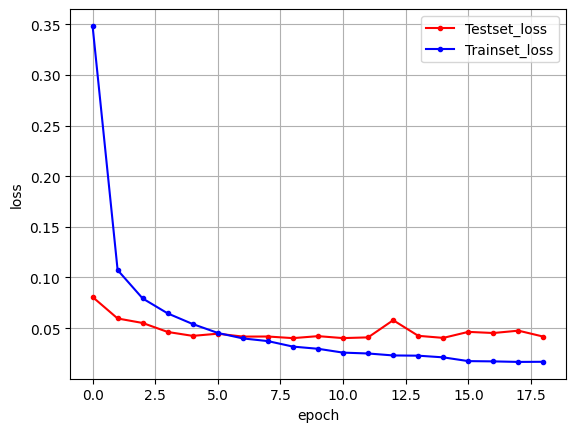

In [18]:
# 시각화
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

확인문제 3 : 다층 퍼셉트론과 컨볼루션 신경망의 결과를 비교해보세요

다층 퍼셉트론은 간단하고 빠르지만 과적합 위험이 크다

컨볼루션 신경망은 이미지 분류에서 훨씬 더 나은 일반화 성능을 보인다.